In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
m = 0.1
r = 0.1 
d = 0.3
g = 9.81
psi_dot = 400 # rad/s
theta_= np.pi/4

In [4]:
Iz = 0.5*m**r**2
I0= 1/4*m*r**2+ m*d**2
p_phi = Iz*psi_dot*np.cos(theta_)
p_psi = Iz*psi_dot
#psi_dot ϕ˙=(pϕ−pψcosθ)/I1sin2θ
#phi_dot = ψ˙=(pψI3−(pϕ−pψcosθ))/cosθI1sin2θ

In [6]:
def System(y0, t, psi_dot,theta_):
    phi, psi, theta, theta_dot = y0
    # Calcular aceleraciones angulares
    phi_dot = psi_dot*Iz*np.cos(theta_)
    psi_dot = p_psi /Iz
    dtheta=theta_dot
    theta_double_dot = (psi_dot**2*np.sin(theta)*np.cos(theta)*(Iz-0.5*m*r**2)-phi_dot*psi_dot*Iz*np.sin(theta) + m*g*d*np.sin(theta))/ I0
    
    return [phi_dot, psi_dot, dtheta, theta_double_dot]

In [7]:
phi0 = 0
psi0 = 0
theta0 = np.pi / 4
theta_dot0 = 0
y0 = [phi0, psi0, theta0, theta_dot0]
t = np.linspace(0, 8, 1000)

In [11]:
# Resolver el sistema de ecuaciones diferenciales
sol = odeint(System, y0, t, args=(psi_dot,theta_,))
phi, psi, _theta, theta_dot = sol.T

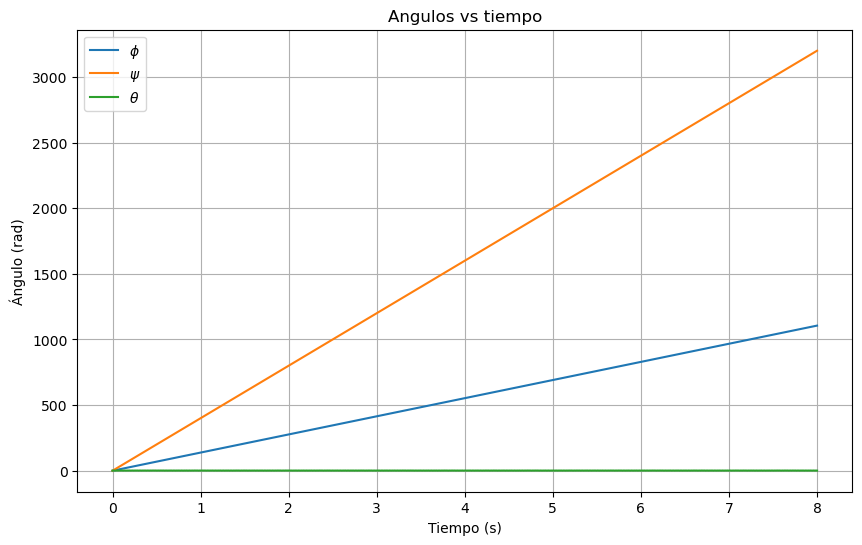

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(t, phi, label=r'$\phi$')
plt.plot(t, psi, label=r'$\psi$')
plt.plot(t, _theta, label=r'$\theta$')
#plt.plot(t, dtheta, label=r'$\theta dot$' )
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Angulos vs tiempo')
plt.legend()
plt.grid(True)
plt.show()

Velocidad de precesion: $\dot{\phi}$

In [15]:
d_phi_dt = np.diff(phi) / np.diff(t)
precesion = np.mean(d_phi_dt)
print("Velocidad de precesión:", precesion)

Velocidad de precesión: 138.20221315315695
